In [146]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [147]:
data = pd.read_csv('/content/titanic_dataset.csv')

In [148]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
data.set_index('PassengerId',inplace =True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
data.shape

(891, 11)

In [151]:
data.describe

<bound method NDFrame.describe of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
...            ...    ...               ...      ...   ...      ...  
887              0      0            211536  13.0000   NaN        S  
888              0      0            112053  30.0000   B42        S  
889              1      2        W./C. 6607  23.4500   NaN        S  
890              0      0            111369  30.0000  C148        C  
891              0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]>

In [152]:
data.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


###  Missing value Handling

In [153]:
data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


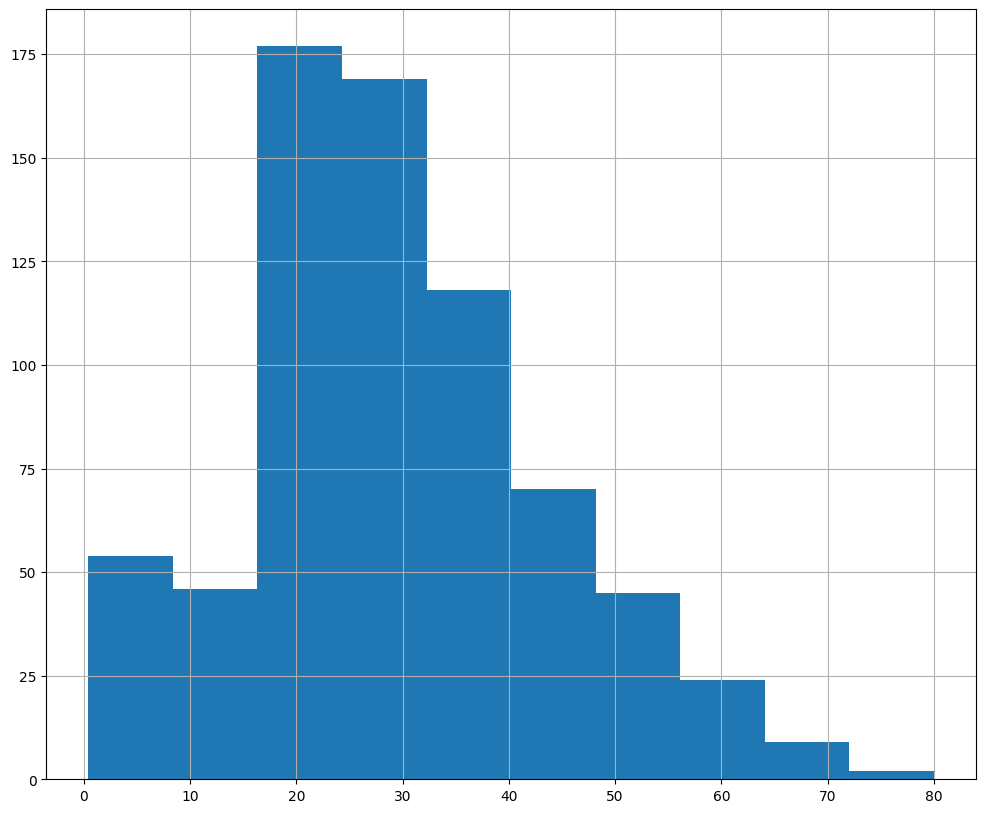

In [154]:
data['Age'].hist(figsize =[12,10])
plt.show()
#since it is not skewed we use mean

In [155]:
data['Age']= data['Age'].fillna(data['Age'].mean())

In [156]:
data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [157]:
data['Cabin'].nunique()

147

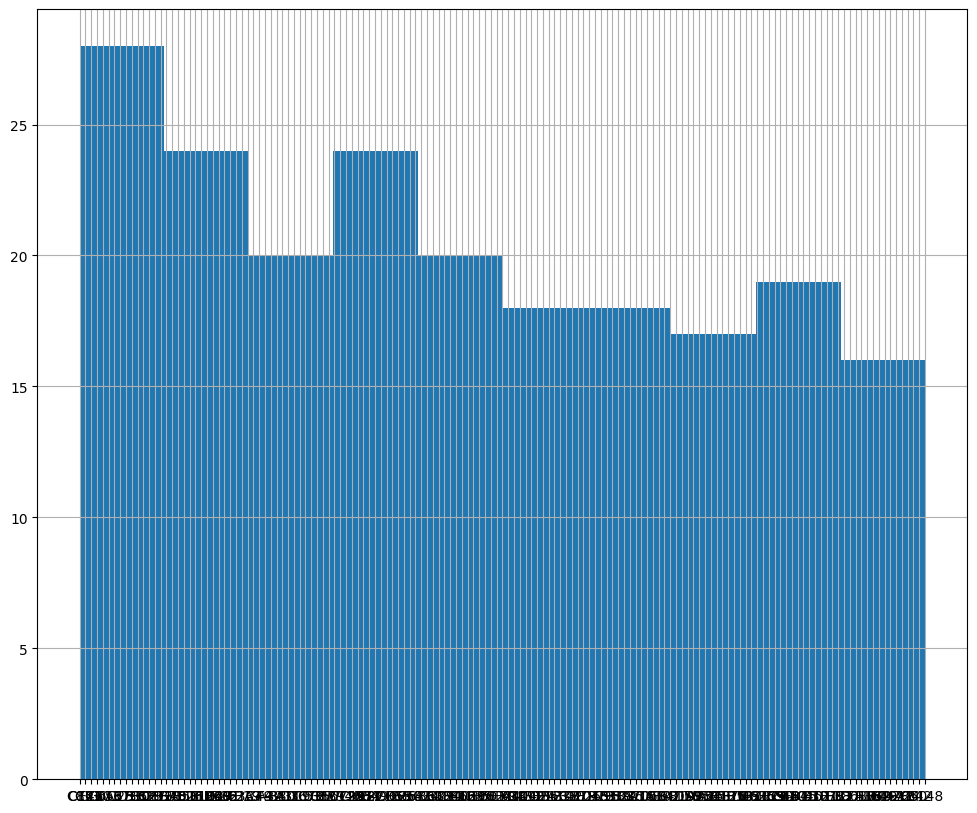

In [158]:
data['Cabin'].hist(figsize =[12,10])
plt.show()

### since it has no relevance in the analysis we drop it

In [159]:
data=data.drop(['Cabin'],axis =1)

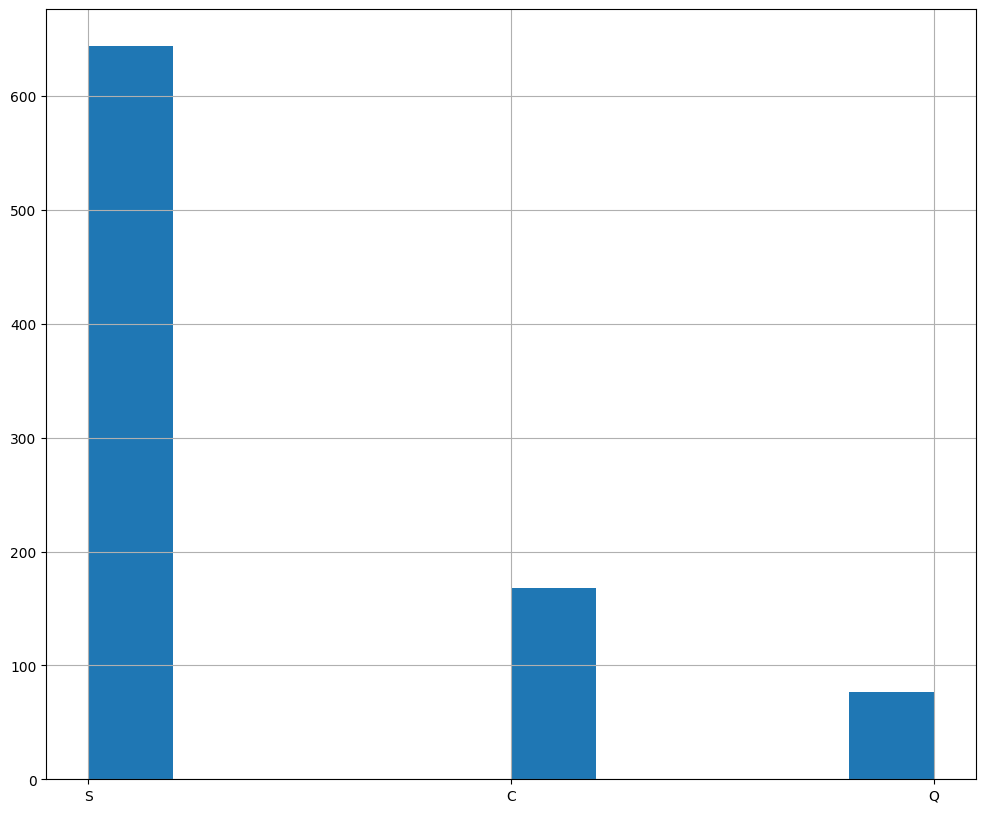

In [160]:
data['Embarked'].hist(figsize =[12,10])
plt.show()

In [161]:
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [162]:
data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


###   since embarked,Name and ticket has no relevance in the analysis we drop it.Also fare and pclass are correlated we drop one of them namely Fare.

In [163]:

data=data.drop(['Embarked','Name','Ticket','Fare'],axis =1)

In [164]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,male,22.0,1,0
2,1,1,female,38.0,1,0
3,1,3,female,26.0,0,0
4,1,1,female,35.0,1,0
5,0,3,male,35.0,0,0


### Outlier detection

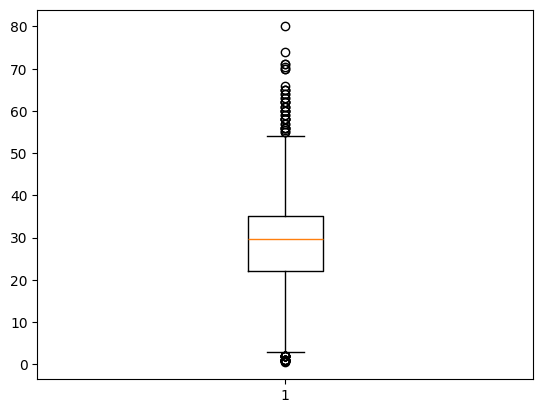

In [165]:
plt.boxplot(data['Age'])
plt.show()

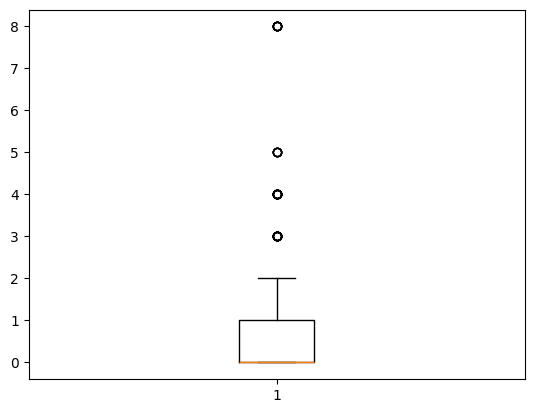

In [166]:
plt.boxplot(data['SibSp'])
plt.show()

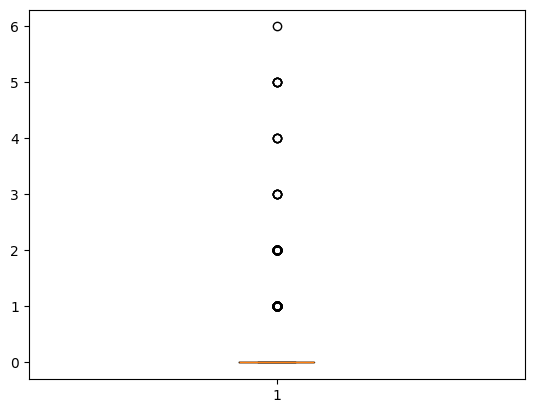

In [167]:
plt.boxplot(data['Parch'])
plt.show()

 since these outlier are relevent in the analysis we do consider it

###  Min-Max Scaling

## Encoding

In [168]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [169]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,1,22.0,1,0
2,1,1,0,38.0,1,0
3,1,3,0,26.0,0,0
4,1,1,0,35.0,1,0
5,0,3,1,35.0,0,0


In [170]:
y = data['Survived']
x = data.drop(['Survived'],axis =1)


In [171]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [172]:
x.head()

,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,
1,3,1,22.0,1,0
2,1,0,38.0,1,0
3,3,0,26.0,0,0
4,1,0,35.0,1,0
5,3,1,35.0,0,0


In [173]:
x1 = x.drop(['Sex'],axis=1)

In [174]:
x1.head()

,Pclass,Age,SibSp,Parch
PassengerId,,,,
1,3,22.0,1,0
2,1,38.0,1,0
3,3,26.0,0,0
4,1,35.0,1,0
5,3,35.0,0,0


In [175]:
x1.shape

(891, 4)

In [176]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))
x1= min_max.fit_transform(x1)

In [177]:
type(x1)

numpy.ndarray

In [178]:
x1=pd.DataFrame(x1,columns =['Pclass','Age','SibSp','Parch'])

In [179]:
type(x1)

pandas.core.frame.DataFrame

In [180]:
x1.head()

,Pclass,Age,SibSp,Parch
0,1.0,0.271174,0.125,0.0
1,0.0,0.472229,0.125,0.0
2,1.0,0.321438,0.000,0.0
3,0.0,0.434531,0.125,0.0
4,1.0,0.434531,0.000,0.0


In [181]:
x.head()

,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,
1,3,1,22.0,1,0
2,1,0,38.0,1,0
3,3,0,26.0,0,0
4,1,0,35.0,1,0
5,3,1,35.0,0,0


In [182]:
x = x.drop(['Pclass','Age','SibSp','Parch'], axis = 1)

In [183]:
x.head()

,Sex
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [184]:
x=pd.concat([x,x1],axis=1)

In [185]:
x.head()

,Sex,Pclass,Age,SibSp,Parch
1,1.0,0.0,0.472229,0.125,0.0
2,0.0,1.0,0.321438,0.000,0.0
3,0.0,0.0,0.434531,0.125,0.0
4,0.0,1.0,0.434531,0.000,0.0
5,1.0,1.0,0.367921,0.000,0.0


In [186]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
